# Procesamiento de señales
## Tarea 2
### Javier Peralta


## Histogramas

### Histograma en escala de grises

El hisotgrama es una función cuyo dominio contiene el rango dinámico de la imágen y su rango es la cuenta de cada intensidad en el rango dinámico de la imágen

In [101]:
from skimage import io, data
import matplotlib.pyplot as plt
import numpy as np

# only works with uint8...
# should modify to account for other cases (flot, int16, etc)
def histo(img) :
    sz = img.shape[0] * img.shape[1]
    max_v = 256 #should automatically generate
    hist = np.zeros((max_v,))
    for i in range(img.shape[0]) :
        for j in range(img.shape[1]) :
            hist[img[i, j]] += 1.0/sz
    return hist

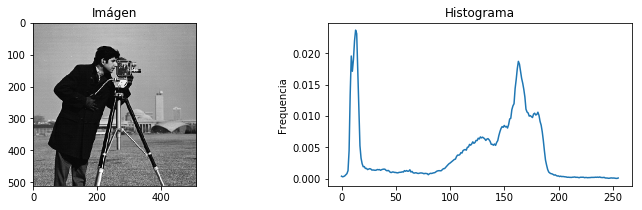

In [102]:
camera = data.camera()
hist = histo(camera)
#plot histogram and image
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,3))
ax1.set_title('Imágen')
ax1.imshow(camera, cmap='gray')
plt.ylabel('Frequencia')
ax2.plot(hist)
ax2.set_title('Histograma')
plt.show()

Un histograma cumulativo indica la frequencia de las intensidades iguales o menores.

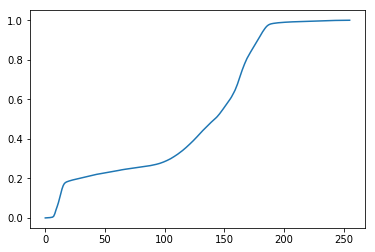

In [103]:
#Acepta histogrma o imágen
def histoCumulative(hist) :
#     if len(hist.shape)
    cHist = np.zeros_like(hist)
    cHist[0] = hist[0]
    for i in range(1, hist.shape[0]) :
        cHist[i] = cHist[i-1] + hist[i]
    return cHist
cHist = histoCumulative(hist)
plt.plot(cHist)
plt.show()

### Función de transferencia tonal

Una función de transferencia tonal es una función en $\mathbb{R}$ que mapea un rango dinámico a otro.

Podemos usar nuestro histograma cumulativo como una función de transferencia tonal!

In [154]:
def transferenciaTonal(img, funcion):
    n_img = np.zeros_like(img)
    for i in range(img.shape[0]) :
        for j in range(img.shape[1]) :
            n_img[i, j] =  255 * funcion[img[i,j]]
    return n_img

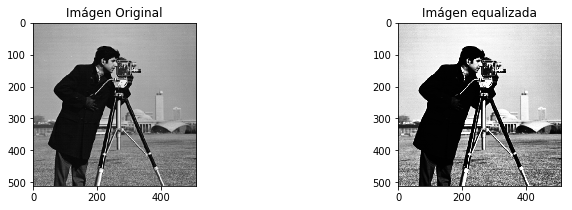

In [155]:
n_cam = transferenciaTonal(camera, cHist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,3))
ax1.set_title('Imágen Original')
ax1.imshow(camera, cmap='gray')
ax2.imshow(n_cam, cmap='gray')
ax2.set_title('Imágen equalizada')
plt.show()

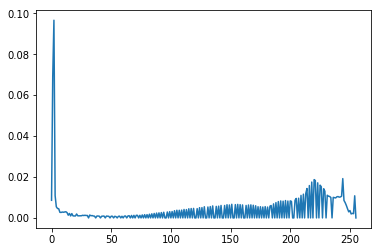

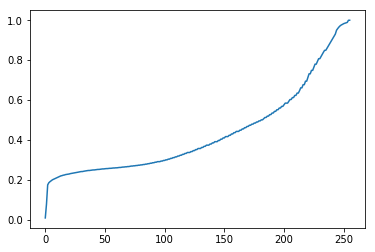

In [157]:
hist = histo(n_cam)
plt.plot(hist)
plt.show()
cHist = histoCumulative(hist)
plt.plot(cHist)
plt.show()

### Histograma a color

Al igual que el histograma en escala de grises, el histograma a color es una función cuyo domino contiene el rango dinámico de la imágen y su rango es la cuenta de cada color/canal en el rango dinámico de la imágen.

Podemos modificar nuestro código para funcionar con imágenes a color y en escala de grises.

In [158]:
# only works with uint8...
# should modify to account for other cases (flot, int16, etc)
def histo(img) :
    sz = img.shape[0] * img.shape[1]
    max_v = 256 #should automatically generate
    hist = np.zeros((max_v,))
    if len(img.shape) == 2 : #assume gray scale
        for i in range(img.shape[0]) :
            for j in range(img.shape[1]) :
                hist[img[i, j]] += 1.0/sz
    elif len(img.shape) == 3: #assume color image
        for i in range(img.shape[0]) :
            for j in range(img.shape[1]) :
                for k in range(img.shape[2]) :
                    hist[img[i, j, k]] += 1.0/(3*sz)
    return hist

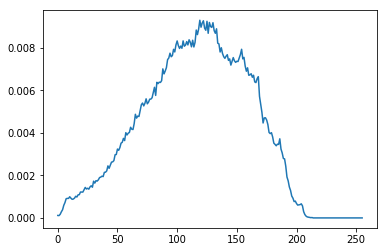

In [159]:
cat = data.chelsea()
hist = histo(cat)
plt.plot(hist)
plt.show()

Nuestro histograma cumulativo sigue funcionando igual

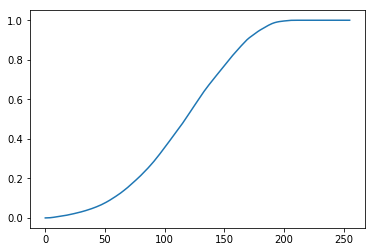

In [160]:
cHist = histoCumulative(hist)
plt.plot(cHist)
plt.show()

También podemos modificar nuestra función para modificar transferencia tonal

In [161]:
def transferenciaTonal(img, funcion) :
    n_img = np.zeros_like(img)
    if len(img.shape) == 2 :
        for i in range(img.shape[0]) :
            for j in range(img.shape[1]) :
                n_img[i, j] =  img[i,j] * funcion[img[i,j]]
    elif len(img.shape) == 3 :
        for i in range(img.shape[0]) :
            for j in range(img.shape[1]) :
                for k in range(img.shape[2]) :
                    n_img[i, j, k] =  255 * funcion[img[i,j,k]]
    return n_img

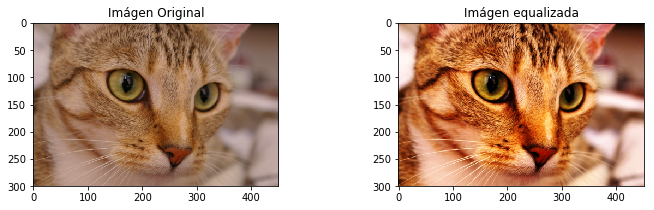

In [162]:
n_cat = transferenciaTonal(cat, cHist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,3))
ax1.set_title('Imágen Original')
ax1.imshow(cat)
ax2.imshow(n_cat)
ax2.set_title('Imágen equalizada')
plt.show()

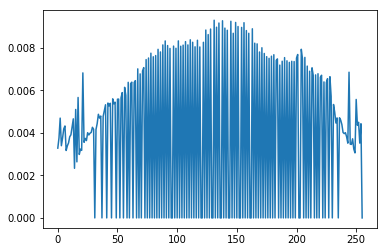

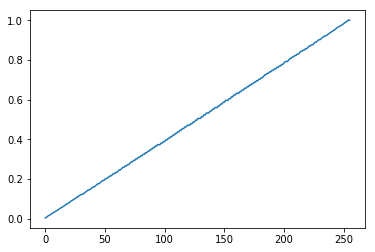

In [163]:
hist = histo(n_cat)
plt.plot(hist)
plt.show()
cHist = histoCumulative(hist)
plt.plot(cHist)
plt.show()